<a href="https://colab.research.google.com/github/Lindaagstna/praktikumIR03/blob/main/pertemuan03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_xml('/content/drive/MyDrive/SEMESTER3/praktikum_IR/pertemuan3/data/kompas-beritaPart1.xml')
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [4]:
df.isnull().sum()

,0
sumber,0
tanggal,0
kategori,0
judul,0
isi,0
link,0
jumlahkata,0


In [5]:
def caseFolding(text):
  text = text.lower()
  return text

contoh = "Terimakasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'case folded: {caseFolding(contoh)}')

original: Terimakasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
case folded: terimakasih, kak! kamu sangat baik sekali kepadaku hari ini.


In [6]:
import re
def punctuationRemoval(text):
  text = re.sub(r'[^\w\s]', '', text)
  return text

contoh = "Terimakasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'punctuation removed: {punctuationRemoval(contoh)}')

original: Terimakasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
punctuation removed: Terimakasih Kak Kamu sangat baik sekali kepadaku hari ini


In [7]:
df['clean'] = df['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuationRemoval)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...


In [8]:
def tokensize(text):
  return text.split()

contoh = "Terimakasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')

clean = caseFolding(contoh)
clean = punctuationRemoval(clean)
print(f'tokenized: {tokensize(clean)}')

original: Terimakasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
tokenized: ['terimakasih', 'kak', 'kamu', 'sangat', 'baik', 'sekali', 'kepadaku', 'hari', 'ini']


In [9]:
df['tokens'] = df['clean'].apply(tokensize)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...,"[jakarta, kompascom, ponsel, android, huawei, ..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...,"[jakarta, kompascom, sejak, 2013, wacana, tent..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...,"[jakarta, kompascom, danis, darusman, pelangga..."
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...,"[kompascom, salah, satu, momok, yang, dihadapi..."
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...,"[jakarta, kompascom, resmi, diperkenalkan, pad..."


In [10]:
from collections import Counter
all_token = []
for tokens in df['tokens']:
  for token in tokens:
    all_token.append(token)

term_freq = Counter(all_token)
term_freq_df = pd.DataFrame(term_freq.most_common(), columns=['term', 'freq'])
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False)
term_freq_df_sorted.head()

,term,freq
0,yang,6450
1,di,5824
2,dan,4915
3,ini,2744
4,dengan,2625


In [11]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False)
term_freq_df_sorted.head()

,term,freq,rank
0,yang,6450,1.0
1,di,5824,2.0
2,dan,4915,3.0
3,ini,2744,4.0
4,dengan,2625,5.0


In [12]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)

tf_sorted_rank = term_freq_df_sorted.sort_values(by='rank', ascending=True)
tf_sorted_rank.head(100)

,term,freq,rank
0,yang,6450,1
1,di,5824,2
2,dan,4915,3
3,ini,2744,4
4,dengan,2625,5
...,...,...,...
95,dapat,360,96
96,republikacoid,352,97
97,lain,350,98
99,negara,345,99


In [13]:
rank_terbawah = term_freq_df_sorted.tail(10)
rank_terbawah = rank_terbawah.sort_values(by='rank', ascending=False)

rank_terbawah.tail(10)

,term,freq,rank
24823,merakyat,1,24855
24822,kaldu,1,24854
24841,nyengat,1,24853
24854,ttu,1,24852
24832,bangalore,1,24851
24833,jeprima,1,24850
24834,233,1,24849
24835,gurih,1,24848
24840,dicampurkan,1,24847
24853,nekat,1,24846


In [14]:
term_freq_df_sorted['k = f * r'] = term_freq_df_sorted['freq'] * term_freq_df_sorted['rank']
term_freq_df_sorted.head(n=1000)

,term,freq,rank,k = f * r
0,yang,6450,1,6450
1,di,5824,2,11648
2,dan,4915,3,14745
3,ini,2744,4,10976
4,dengan,2625,5,13125
...,...,...,...,...
999,persoalan,44,996,43824
1007,peltu,44,997,43868
1004,menghadiri,44,998,43912
1005,demi,44,999,43956


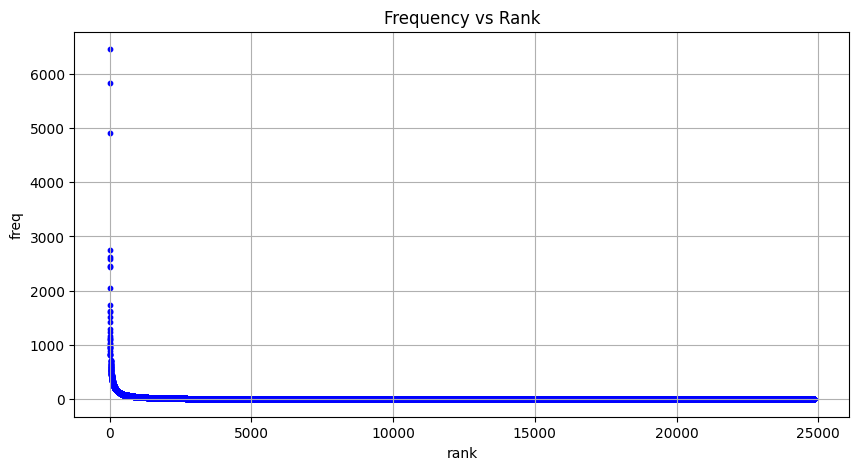

In [15]:
import matplotlib.pyplot as plt

rank = term_freq_df_sorted['rank']
freq = term_freq_df_sorted['freq']
plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color='blue', s=10)
plt.title('Frequency vs Rank')
plt.xlabel('rank')
plt.ylabel('freq')

plt.grid(True)
plt.show()

In [16]:
top_5000_words = term_freq_df_sorted.head(5000)

# Mencari kata yang panjangnya lebih dari 15 huruf
long_words = top_5000_words[top_5000_words['term'].str.len() > 15]

print("\n--- 10 Kata Sangat Panjang (dari Top 5000) ---")
print(long_words.head(10))


--- 10 Kata Sangat Panjang (dari Top 5000) ---
                      term  freq  rank  k = f * r
2224      mempertimbangkan    18  2253      40554
2352      mengidentifikasi    17  2396      40732
2517  republikacoidjakarta    16  2493      39888
4774      terindentifikasi     7  4785      33495


In [17]:
# Mencari kata yang hanya terdiri dari angka
low_freq_df = term_freq_df_sorted[term_freq_df_sorted['freq'] == 1]

numeric_words = low_freq_df[low_freq_df['term'].str.isnumeric()]

print("--- 10 Kata Numerik (Frekuensi 1) ---")
print(numeric_words.head(10))

--- 10 Kata Numerik (Frekuensi 1) ---
           term  freq   rank  k = f * r
12235     80211     1  12271      12271
12250   2162015     1  12286      12286
12311       404     1  12347      12347
12327      3200     1  12363      12363
12328      1920     1  12364      12364
12333       512     1  12369      12369
12336  19149000     1  12372      12372
12406       923     1  12410      12410
12402      2320     1  12438      12438
12442      1855     1  12478      12478


In [18]:
mixed_words = term_freq_df_sorted[
    (term_freq_df_sorted['term'].str.isalnum() == True) &
    (term_freq_df_sorted['term'].str.isalpha() == False) &
    (term_freq_df_sorted['term'].str.isnumeric() == False)
]

print("\n--- 10 Kata Campuran Huruf & Angka ---")
print(mixed_words.head(100))


--- 10 Kata Campuran Huruf & Angka ---
        term  freq  rank  k = f * r
84      c130   376    85      31960
371    a1310   115   372      42780
668     ke69    67   671      44957
904    c130b    50   889      44450
1252   up2dp    35  1239      43365
...      ...   ...   ...        ...
9537   a1320     2  9529      19058
9536   a1319     2  9530      19060
9514  1960an     2  9552      19104
9513  1950an     2  9553      19106
9542   a1322     2  9556      19112

[100 rows x 4 columns]


In [19]:
low_freq_df = term_freq_df_sorted[term_freq_df_sorted['freq'] == 1]

# Mencari kata yang panjangnya kurang dari 3 huruf
short_words = low_freq_df[low_freq_df['term'].str.len() < 3]

print("\n--- 10 Kata Sangat Pendek (Frekuensi 1) ---")
print(short_words.head(10))


--- 10 Kata Sangat Pendek (Frekuensi 1) ---
      term  freq   rank  k = f * r
12265   cv     1  12301      12301
12270   id     1  12306      12306
12330   i5     1  12366      12366
12331   i7     1  12367      12367
12471   do     1  12507      12507
12579    0     1  12615      12615
12786   p2     1  12822      12822
12932   jx     1  12936      12936
13149   gr     1  13185      13185
13202   oh     1  13238      13238
